In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams['figure.figsize'] = (10,6)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# Load the data
data = pd.read_csv("../offline_data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


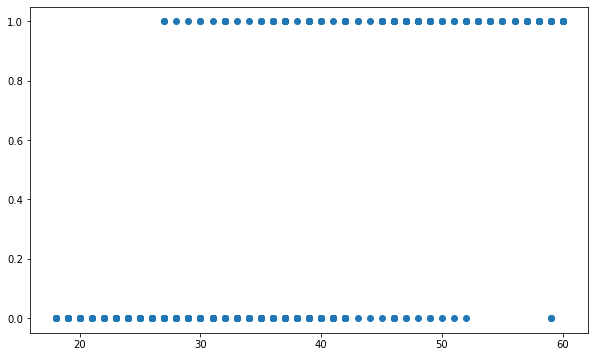

In [4]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size = 0.20)

In [66]:
def normalize(X):
    return X - X.mean()

def predict(X,b0,b1):
    Y = np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
    return Y
    
def logistic_regression(X,Y):
    
    X = normalize(X)
    
    # initalize
    b0 = 0
    b1 = 0
    L = 0.001    
    epochs = 300 # <- similar to max_iter I think>
    
    for epoch in range(epochs):
        y_p = predict(X, b0, b1)
        D_b0 = -2 * sum((Y-y_p) * y_p * (1-y_p))
        D_b1 = -2 * sum(X * (Y - y_p))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0,b1
    
    

In [67]:
b0, b1 = logistic_regression(X_train,y_train)

In [68]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm,b0,b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

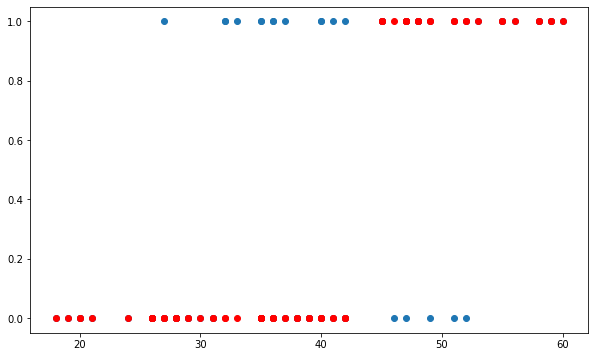

In [69]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,c='red')

In [70]:
acur = np.sum(y_pred == y_test) / len(y_pred)

In [71]:
acur

0.775

In [107]:
from sklearn.linear_model import LogisticRegression

In [110]:
X_tr = np.array(X_train.values).reshape(-1, 1)
y_tr = np.array(y_train.values).reshape(-1, 1)
lr_model = LogisticRegression()
lr_model.fit(X_tr,y_tr)
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [112]:
acur = np.sum(y_pred_sk == y_test) / len(y_pred)
acur

0.775

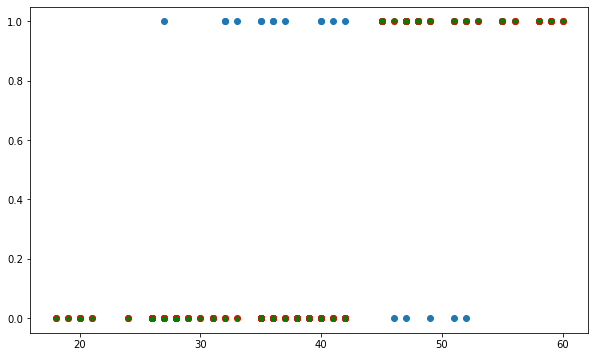

In [95]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,c='red')
plt.scatter(X_test,y_pred_sk,marker='*',c='g')

### Try with two variables (not working. . .)


In [26]:
X1_tr, X1_te, X2_tr, X2_te, y_tr, y_te = \
    train_test_split(data['Age'], data['EstimatedSalary'], data['Purchased'], test_size = 0.20)

In [102]:
def normalize(X):
    return X - X.mean()

def predict(X1,X2,b0,b1,b2):
    Y = np.array([1 / (1 + exp(-1.0*b0 + -1.0*b1*X1.iloc[i] + -1.0*b2*X2.iloc[i])) for i in range(len(X1))])
    return Y
    
def logistic_regression(X1,X2,Y):
    
    X1 = normalize(X1)
    X2 = normalize(X2)
    
    # initalize
    b0 = 0
    b1 = 0
    b2 = 0
    L = 0.00001    
    epochs = 300
    
    for epoch in range(epochs):
        y_p = predict(X1,X2, b0, b1, b2)
        D_b0 = -2 * sum((Y-y_p) * y_p * (1-y_p))
        D_b1 = -2 * sum(X1 * (Y - y_p))
        D_b2 = -2 * sum(X2 * (Y - y_p))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
        b2 = b2 - L * D_b2
        print(b0,b1,b2)
    
    return b0,b1,b2
    

In [103]:
b0, b1, b2 = logistic_regression(X1_tr,X2_tr,y_tr)

-0.00022 0.019640249999999974 42.687000000000005


OverflowError: math range error

In [42]:
test = [2*X1_tr[i] for i in range(len(X1_tr))]

KeyError: 6

In [51]:
[X1_tr.iloc[i] for i in range(len(X1_tr))]

[48,
 29,
 41,
 20,
 28,
 23,
 38,
 24,
 42,
 36,
 37,
 27,
 46,
 37,
 36,
 48,
 57,
 39,
 48,
 33,
 38,
 54,
 35,
 37,
 49,
 28,
 35,
 20,
 22,
 26,
 37,
 18,
 28,
 37,
 46,
 38,
 31,
 59,
 31,
 47,
 45,
 45,
 37,
 51,
 47,
 26,
 29,
 34,
 35,
 59,
 30,
 34,
 49,
 53,
 42,
 29,
 31,
 39,
 42,
 35,
 20,
 47,
 33,
 29,
 35,
 47,
 29,
 38,
 19,
 40,
 27,
 40,
 39,
 47,
 26,
 49,
 45,
 55,
 52,
 47,
 37,
 41,
 40,
 41,
 42,
 42,
 21,
 40,
 20,
 30,
 47,
 52,
 50,
 39,
 30,
 42,
 59,
 43,
 29,
 39,
 46,
 30,
 27,
 43,
 37,
 20,
 47,
 59,
 59,
 37,
 41,
 60,
 53,
 31,
 26,
 28,
 50,
 57,
 46,
 39,
 48,
 48,
 30,
 31,
 45,
 48,
 41,
 46,
 22,
 32,
 35,
 35,
 31,
 20,
 26,
 39,
 52,
 19,
 32,
 19,
 28,
 40,
 35,
 35,
 54,
 40,
 41,
 32,
 40,
 49,
 49,
 24,
 38,
 50,
 40,
 44,
 40,
 36,
 56,
 26,
 39,
 24,
 29,
 27,
 35,
 36,
 35,
 28,
 58,
 24,
 36,
 52,
 48,
 33,
 35,
 47,
 49,
 40,
 22,
 37,
 35,
 35,
 47,
 26,
 53,
 32,
 31,
 33,
 39,
 48,
 27,
 35,
 48,
 35,
 36,
 34,
 39,
 40,
 20,
 26,


In [61]:
predict(X1_tr,X2_tr,.3,.2,.7)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.